## Imports

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Problem 1

### Code

In [194]:
def SIS_P1(S0, I0, beta, gamma, t_max, stepsize):
    T = np.arange(0, t_max+stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] + gamma * I[idx-1]
            dI_dt = beta * S[idx-1] * I[idx-1] - gamma * I[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize     
    return S, I, T

In [195]:
def I_analytical(I0, beta, gamma, T):
    R0 = beta / gamma
    if R0 > 1:
        I_infinity = (1 - (1 / R0))/(1 + ((1 - (1 / R0) - I0)/ I0) * np.exp(-(beta - gamma) * T))
    else:
        I_infinity = 0.0
    I_analytic = np.full(len(T), I_infinity)
    return I_analytic

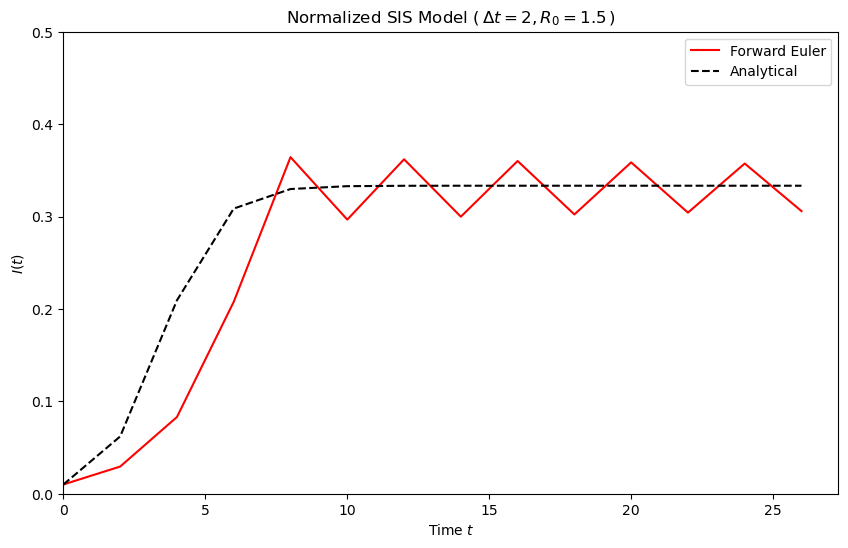

The theoretical endemic infected fraction (I_infinity) is: 0.3333333333
The simulated final infected fraction is: 0.3058


In [196]:
S0 = 0.99
I0 = 0.01
beta = 3.0
gamma = 2.0
t_max = 25
stepsize_1 = 2

S_1a, I_1a, T_1a = SIS_P1(S0, I0, beta, gamma, t_max, stepsize_1)

I_analytic_plot_a = I_analytical(I0, beta, gamma, T_1a)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(T_1a, I_1a, color='r', label='Forward Euler')
ax.plot(T_1a, I_analytic_plot_a, linestyle='--', color='black', label='Analytical')

ax.set_xlabel('Time $t$')
ax.set_ylabel('$I(t)$')
ax.set_ylim(0, 0.5)
ax.set_xlim(left=0)
ax.legend()

R0_sis = beta / gamma
plt.title(f'Normalized SIS Model ($\\,\\Delta t = {stepsize_1}, R_0 = {R0_sis}\\,$)')
plt.show()

I_endemic_theory = 1 - 1/R0_sis # I_infinity for SIS when beta > gamma
print(f"The theoretical endemic infected fraction (I_infinity) is: {I_endemic_theory:.10f}")
print(f"The simulated final infected fraction is: {I_1a[-1]:.4f}")

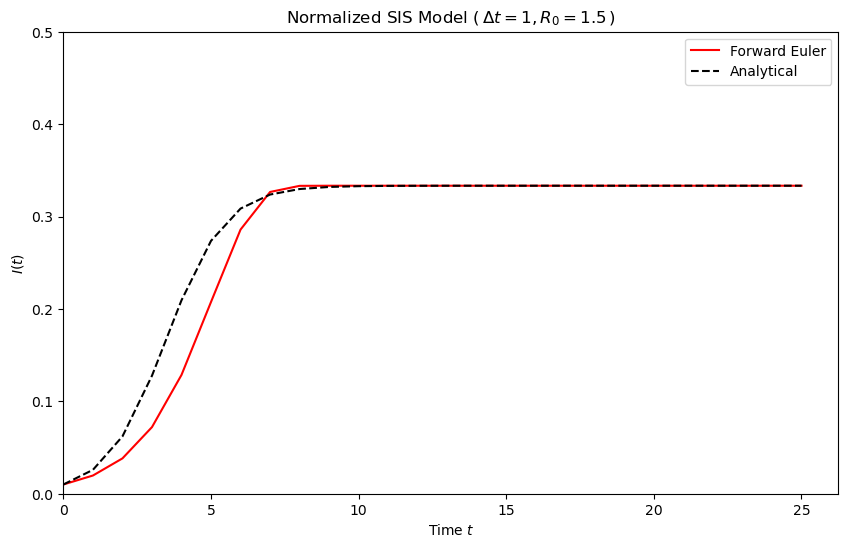

The theoretical endemic infected fraction (I_infinity) is: 0.3333333333
The simulated final infected fraction is: 0.3333333333


In [197]:
S0 = 0.99
I0 = 0.01
beta = 3.0
gamma = 2.0
t_max = 25
stepsize_2 = 1

S_1b, I_1b, T_1b = SIS_P1(S0, I0, beta, gamma, t_max, stepsize_2)

I_analytic_plot_b = I_analytical(I0, beta, gamma, T_1b)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(T_1b, I_1b, color='r', label='Forward Euler')
ax.plot(T_1b, I_analytic_plot_b, linestyle='--', color='black', label='Analytical')

ax.set_xlabel('Time $t$')
ax.set_ylabel('$I(t)$')
ax.set_ylim(0, 0.5)
ax.set_xlim(left=0)
ax.legend()

R0_sis = beta / gamma
plt.title(f'Normalized SIS Model ($\\,\\Delta t = {stepsize_2}, R_0 = {R0_sis}\\,$)')
plt.show()

I_endemic_theory = 1 - 1/R0_sis # I_infinity for SIS when beta > gamma
print(f"The theoretical endemic infected fraction (I_infinity) is: {I_endemic_theory:.10f}")
print(f"The simulated final infected fraction is: {I_1b[-1]:.10f}")

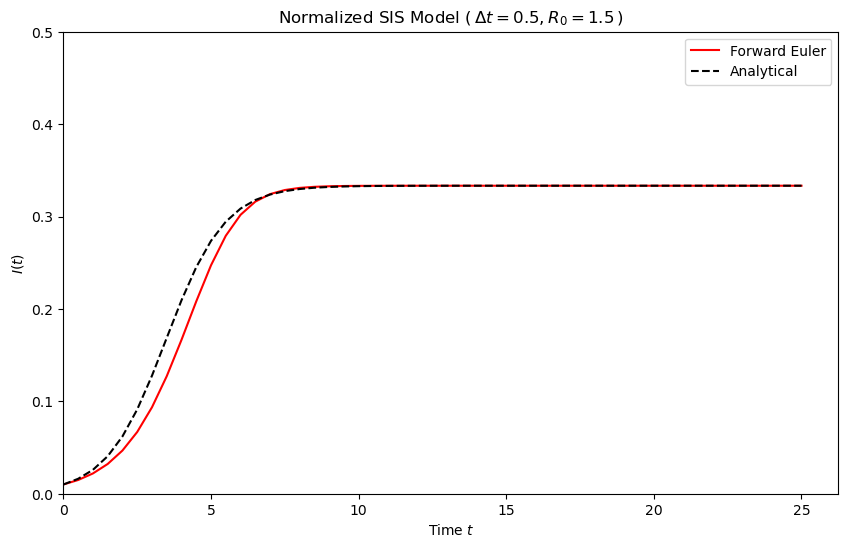

The theoretical endemic infected fraction (I_infinity) is: 0.3333333333
The simulated final infected fraction is: 0.3333333333


In [198]:
S0 = 0.99
I0 = 0.01
beta = 3.0
gamma = 2.0
t_max = 25
stepsize_3 = 0.5

S_1c, I_1c, T_1c = SIS_P1(S0, I0, beta, gamma, t_max, stepsize_3)

I_analytic_plot_c = I_analytical(I0, beta, gamma, T_1c)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(T_1c, I_1c, color='r', label='Forward Euler')
ax.plot(T_1c, I_analytic_plot_c, linestyle='--', color='black', label='Analytical')

ax.set_xlabel('Time $t$')
ax.set_ylabel('$I(t)$')
ax.set_ylim(0, 0.5)
ax.set_xlim(left=0)
ax.legend()

R0_sis = beta / gamma
plt.title(f'Normalized SIS Model ($\\,\\Delta t = {stepsize_3}, R_0 = {R0_sis}\\,$)')
plt.show()

I_endemic_theory = 1 - 1/R0_sis # I_infinity for SIS when beta > gamma
print(f"The theoretical endemic infected fraction (I_infinity) is: {I_endemic_theory:.10f}")
print(f"The simulated final infected fraction is: {I_1c[-1]:.10f}")

In [201]:
def compute_max_error(s0, i0, beta, gamma, t_max, stepsize):
    s_euler, i_euler, T_euler = SIS_P1(s0, i0, beta, gamma, t_max, stepsize)
    I_infinity = I_analytical(i0, beta, gamma, T_euler)
    error_array = np.abs(i_euler - I_infinity)
    E = np.max(error_array)
    return E

error_step_1 = compute_max_error(S0, I0, beta, gamma, t_max, stepsize_1)
error_step_2 = compute_max_error(S0, I0, beta, gamma, t_max, stepsize_2)
error_step_3 = compute_max_error(S0, I0, beta, gamma, t_max, stepsize_3)

print(f"The maximum errors for stepsize {stepsize_1} is : {error_step_1}")
print(f"The maximum errors for stepsize {stepsize_2} is : {error_step_2}")
print(f"The maximum errors for stepsize {stepsize_3} is : {error_step_3}")

The maximum errors for stepsize 2 is : 0.1263393498870075
The maximum errors for stepsize 1 is : 0.08077107437456943
The maximum errors for stepsize 0.5 is : 0.04283504637204699


Text(0, 0.5, 'Maximum Error $E(\\Delta t)$')

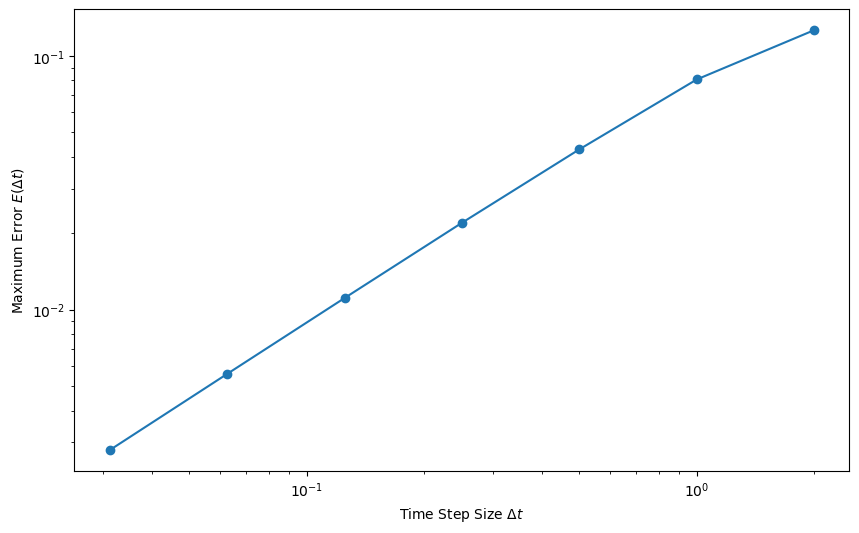

In [202]:
delta_t = {2, 1, 1/2, 1/4, 1/8, 1/16, 1/32}

for t in delta_t:
    error = compute_max_error(S0, I0, beta, gamma, t_max, t)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sorted(delta_t), [compute_max_error(S0, I0, beta, gamma, t_max, dt) for dt in sorted(delta_t)], marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time Step Size $\\Delta t$')
ax.set_ylabel('Maximum Error $E(\\Delta t)$')